# Dataframes and visualisations:

In this notebook, I create more useable and relevant dataframes from the data collected by Maia. I then use these dataframes to create visualisations such as bar charts, word clouds and a few time series graphs for some of our more interesting observations.

In [1]:
import pandas as pd

In [2]:
acct_file = "data/reptweets.csv"
word_count_filename = "data/word_count.csv"
df_politicians = pd.read_csv(acct_file)
# csv file has trailing spaces on some column names, this insures there are no leading or trailing spaces
df_politicians.columns = df_politicians.columns.str.strip()
df_word_count = pd.read_csv(word_count_filename, low_memory=False)
# combines the two dataframes joining on the common handle column
df_party_word_count = pd.merge(df_politicians, df_word_count, how='inner', on='handle')
# get republicans
df_reps = df_party_word_count[df_party_word_count.party == 'R']
df_dems = df_party_word_count[df_party_word_count.party == 'D']
# get independants but only return the columns Word and Count
df_dem_words = df_party_word_count[df_party_word_count.party == 'D'][['Word', 'Count']]
df_rep_words = df_party_word_count[df_party_word_count.party == 'R'][['Word', 'Count']]

In [3]:
df_dem_sorted = df_dem_words.groupby(['Word']).sum().sort_values(by=["Count"], ascending = False)

In [4]:
df_dem_sorted.to_csv('C:/Users/Amara/Documents/GitHub/DS105_Group_Final_Project/democrat_word_counts.csv')

In [5]:
df_rep_sorted = df_rep_words.groupby(['Word']).sum().sort_values(by=["Count"], ascending = False)

In [6]:
df_rep_sorted.to_csv('C:/Users/Amara/Documents/GitHub/DS105_Group_Final_Project/republican_word_counts.csv')

In [7]:
df_democrats = pd.read_csv('democrat_word_counts.csv')

In [8]:
df_democrats

,Word,Count
0,today,106447
1,work,96303
2,more,90738
3,act,77729
4,need,76149
...,...,...
768,buildup,3
769,liberation,3
770,resources,3
771,hr,3


In [9]:
df_dems_top_50 = df_democrats.head(50)

In [10]:
dems_top_words = [x for x in df_dems_top_50['Word']]

In [11]:
df_republicans = pd.read_csv('republican_word_counts.csv')

In [12]:
df_reps_top_50 = df_republicans.head(50)

In [13]:
reps_top_words = [x for x in df_reps_top_50['Word']]

In [14]:
from plotnine import *

In [15]:
g_democrats = (
    ggplot(df_dems_top_50, aes(x="Word",y="Count")) + geom_col(colour='blue', fill='blue') + coord_flip() + theme(figure_size=[9,8]) + ggtitle("Bar graph showing the 50 most frequently used words by Democrats on Twitter")
)

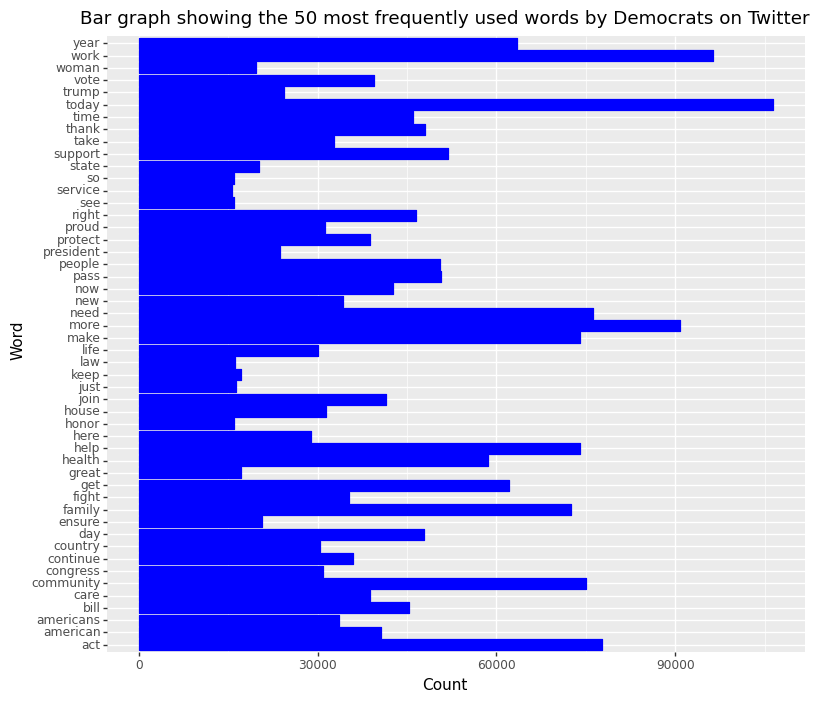

<ggplot: (157620909556)>

In [16]:
g_democrats

In [17]:
ggsave(plot = g_democrats, path = "C:/Users/Amara/Documents/GitHub/DS105_Group_Final_Project/figures")

C:\Users\Amara\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 9 x 8 in image.
C:\Users\Amara\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: C:\Users\Amara\Documents\GitHub\DS105_Group_Final_Project\figures\plotnine-save-157620909556.pdf


In [18]:
g_republicans = (
    ggplot(df_reps_top_50, aes(x="Word",y="Count")) + geom_col(colour='red', fill='red') + coord_flip() + theme(figure_size=[9,8]) + ggtitle("Bar graph showing the 50 most frequently used words by Republicans on Twitter")
)

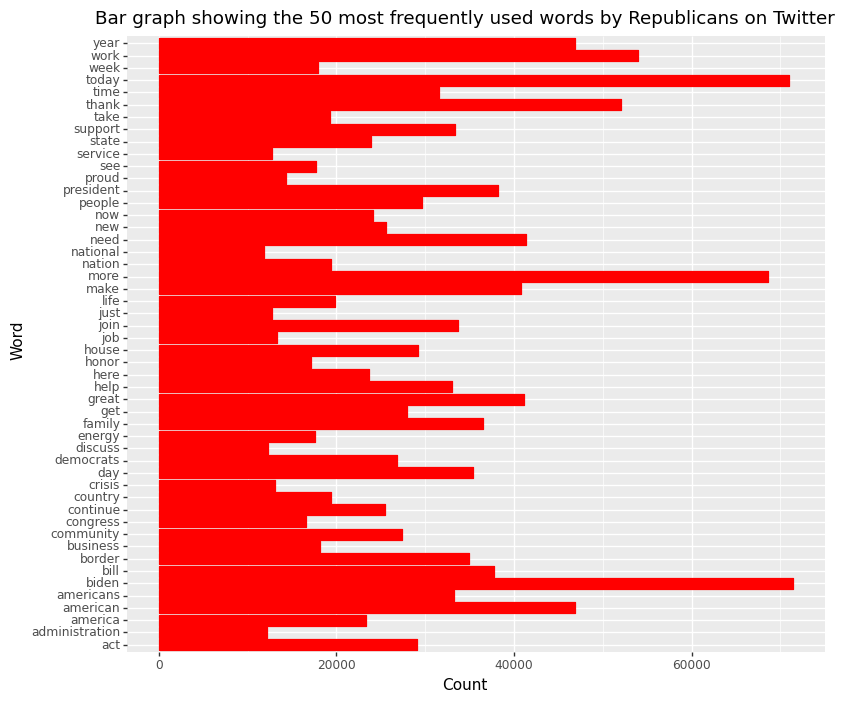

<ggplot: (157627559662)>

In [19]:
g_republicans

In [23]:
ggsave(plot = g_republicans, path = "C:/Users/Amara/Documents/GitHub/DS105_Group_Final_Project/figures")

C:\Users\Amara\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 9 x 8 in image.
C:\Users\Amara\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: C:\Users\Amara\Documents\GitHub\DS105_Group_Final_Project\figures\plotnine-save-157627559662.pdf


In [22]:
import matplotlib.pyplot as plt

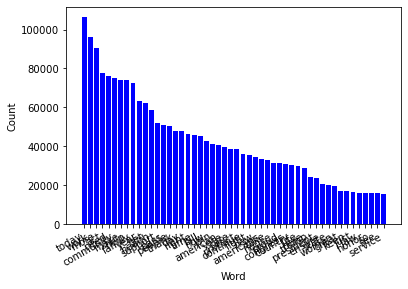

In [24]:
dems_counts = [x for x in df_dems_top_50['Count']]

plt.bar(dems_top_words, height = dems_counts, color = 'blue')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Count")
plt.xlabel("Word")
plt.savefig('figures/democrat_top_50.png', transparent = True)
plt.show()

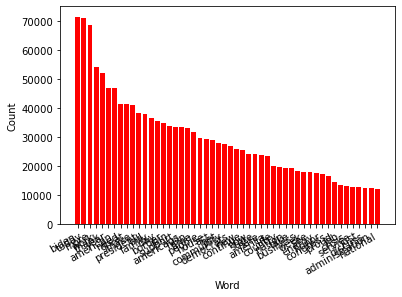

In [25]:
reps_counts = [x for x in df_reps_top_50['Count']]

plt.bar(reps_top_words, height = reps_counts, color = 'red')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Count")
plt.xlabel("Word")
plt.savefig('figures/republican_top_50.png', transparent = True)
plt.show()

## Wordclouds:

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

In [ ]:
dtext = " ".join(i for i in df_democrats.Word)
dwordcloud = WordCloud(background_color="white", scale=3, colormap="Blues").generate(dtext)
plt.figure( figsize=(15,10))
plt.imshow(dwordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('democrats_word_cloud.png')
plt.show()

In [ ]:
rtext = " ".join(i for i in df_republicans.Word)
rwordcloud = WordCloud(background_color="white", scale=3, colormap="Reds").generate(rtext)
plt.figure( figsize=(15,10))
plt.imshow(rwordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('republicans_word_cloud.png')
plt.show()

In [ ]:
import numpy as np

In [ ]:
from PIL import Image

In [ ]:
republican_mask = np.array(Image.open("C:/Users/Amara/Documents/DS105/Group_project/Images/republican_elephant.jpg"))

In [ ]:
rwc2 = WordCloud(background_color="white", mask=republican_mask, max_words=200, scale=3, colormap="Reds").generate_from_text(rtext)
plt.figure( figsize=(10,15))
plt.imshow(rwc2, interpolation='bilinear')
plt.axis("off")
plt.savefig('figures/republican_word_cloud.png', transparent = True)
plt.show()

In [ ]:
democrat_mask = np.array(Image.open("C:/Users/Amara/Documents/DS105/Group_project/Images/democrat_donkey.jpg"))

In [ ]:
dwc2 = WordCloud(background_color="white", mask=democrat_mask, max_words=200, scale=100, colormap="Blues").generate_from_text(dtext)
plt.figure( figsize=(15,15))
plt.imshow(dwc2, interpolation='bilinear')
plt.axis("off")
plt.savefig('figures/democrat_word_cloud.png', transparent = True)
plt.show()

## Finding exclusive trends:

In [ ]:
df_politicians.head()

In [ ]:
df_word_count.head()

In [ ]:
df_party_word_count.head()

In [ ]:
with_dates = pd.read_csv('all_tweets.csv')

In [ ]:
with_dates.tail()

In [ ]:
df_reps.head()

In [ ]:
republican_handles = []
for x in df_reps['handle']:
    if x not in republican_handles:
        republican_handles.append(x)

In [ ]:
len(republican_handles)

In [ ]:
df_dems.head()

In [ ]:
democrat_handles = []
for x in df_dems['handle']:
    if x not in democrat_handles:
        democrat_handles.append(x)

In [ ]:
len(democrat_handles)

In [ ]:
tweets = pd.read_csv("data/tweets.csv")
dates_tweets = tweets.drop(labels='name', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='tweet_id', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='author_id', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='lang', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='replied_to', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='possibly_sensitive', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='conversation_id', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise')

In [ ]:
dates_tweets.head()

In [ ]:
democrat_tweets = []
for i in range(len(dates_tweets)):
    if dates_tweets.iloc[i]['handle'] in democrat_handles:
        democrat_tweets.append(dates_tweets.iloc[i])

In [ ]:
df_democrat_tweets = pd.DataFrame(democrat_tweets)

In [ ]:
df_democrat_tweets.to_csv('C:/Users/Amara/Documents/GitHub/DS105-Project/data/democrat_tweets.csv')

In [ ]:
df_dem_tweets = pd.read_csv('data/democrat_tweets.csv')

In [ ]:
df_dem_tweets.head()

In [ ]:
republican_tweets = []
for i in range(len(dates_tweets)):
    if dates_tweets.iloc[i]['handle'] in republican_handles:
        republican_tweets.append(dates_tweets.iloc[i])

In [ ]:
df_republican_tweets = pd.DataFrame(republican_tweets)

In [ ]:
df_republican_tweets.to_csv('C:/Users/Amara/Documents/GitHub/DS105-Project/data/republican_tweets.csv')

In [ ]:
df_rep_tweets = pd.read_csv('data/republican_tweets.csv')

In [ ]:
df_rep_tweets.head()

In [ ]:
reps_not_dems = []
for i in range(len(reps_top_words)):
    if reps_top_words[i] not in dems_top_words:
        reps_not_dems.append(reps_top_words[i])

In [ ]:
reps_not_dems

In [ ]:
dems_not_reps = []
for i in range(len(dems_top_words)):
    if dems_top_words[i] not in reps_top_words:
        dems_not_reps.append(dems_top_words[i])

In [ ]:
dems_not_reps

In [ ]:
df_dems_top_50.head()

In [ ]:
dems_only_words = []
for i in range(len(df_dems_top_50)):
    for word in dems_not_reps:
        if df_dems_top_50.iloc[i]['Word'] == word:
            dems_only_words.append(df_dems_top_50.iloc[i])

In [ ]:
df_dems_only_words = pd.DataFrame(dems_only_words)

In [ ]:
df_dems_only_words

In [ ]:
g_democrats_only = (
    ggplot(df_dems_only_words, aes(x="Word",y="Count")) + geom_col() + coord_flip() + theme(figure_size=[9,6])
)

In [ ]:
g_democrats_only

In [ ]:
dem_counts = [x for x in df_dems_only_words['Count']]

plt.bar(dems_not_reps, height = dem_counts, color = 'blue')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Count")
plt.xlabel("Word")
plt.show()
plt.savefig('figures/top_democrat_words_exclusive.png')

In [ ]:
reps_only_words = []
for i in range(len(df_reps_top_50)):
    for word in reps_not_dems:
        if df_reps_top_50.iloc[i]['Word'] == word:
            reps_only_words.append(df_reps_top_50.iloc[i])

In [ ]:
df_reps_only_words = pd.DataFrame(reps_only_words)

In [ ]:
df_reps_only_words

In [ ]:
g_republicans_only = (
    ggplot(df_reps_only_words, aes(x="Word",y="Count")) + geom_col() + coord_flip() + theme(figure_size=[9,6])
)

In [ ]:
g_republicans_only

In [ ]:
rep_counts = [x for x in df_reps_only_words['Count']]

plt.bar(reps_not_dems, height = rep_counts, color = 'red')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Count")
plt.xlabel("Word")
plt.show()
plt.savefig('figures/top_republican_words_exclusive.png')

## Time series for 'border' by republicans:

In [ ]:
border_dates = []
for i in range(len(df_rep_tweets)):
    if 'border' in df_rep_tweets.iloc[i]['key_word_list']:
        border_dates.append(df_rep_tweets.iloc[i]['created_at'][:10])

In [ ]:
len(border_dates)

In [ ]:
counts = []
for i in range(len(border_dates)):
    counts.append(1)

In [ ]:
border_df = pd.DataFrame(list(zip(border_dates, counts)),
               columns =['Date', 'Count'])

In [ ]:
len(border_df)

In [ ]:
grouped_border_df = border_df.groupby(['Date']).sum()

In [ ]:
grouped_border_df

In [ ]:
grouped_border_df.plot()

In [ ]:
grouped_border_df.to_csv('C:/Users/Amara/Documents/GitHub/DS105-Project/data/grouped_border_df.csv')

In [ ]:
df_grouped_border = pd.read_csv("data/grouped_border_df.csv")

In [ ]:
x_axis = [x for x in df_grouped_border['Date']]
y_axis = [x for x in df_grouped_border['Count']]

plt.plot(x_axis, y_axis)
plt.title('Plot showing the number of uses of the word \'border\' by republicans')
plt.xlabel('Date')
plt.ylabel('Number of uses')
plt.show()

In [ ]:
series = pd.read_csv("data/grouped_border_df.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()

In [ ]:
df_grouped_border

In [ ]:
border2022 = []
for i in range(len(df_grouped_border)):
    if '2022' in df_grouped_border.iloc[i]['Date']:
        border2022.append(df_grouped_border.iloc[i])

In [ ]:
df_border2022 = pd.DataFrame(border2022)

In [ ]:
df_border2022.head()

In [ ]:
df_border2022.plot()

In [ ]:
border2022_21 = []
for i in range(len(df_grouped_border)):
    if '2022' in df_grouped_border.iloc[i]['Date'] or '2021' in df_grouped_border.iloc[i]['Date']:
        border2022_21.append(df_grouped_border.iloc[i])

In [ ]:
df_border_22_21 = pd.DataFrame(border2022_21)

In [ ]:
df_border_22_21.plot()

In [ ]:
border2022_20 = []
for i in range(len(df_grouped_border)):
    if '2022' in df_grouped_border.iloc[i]['Date'] or '2021' in df_grouped_border.iloc[i]['Date'] or '2020' in df_grouped_border.iloc[i]['Date']:
        border2022_20.append(df_grouped_border.iloc[i])

In [ ]:
df_border_22_20 = pd.DataFrame(border2022_20)

In [ ]:
df_border_22_20.plot()

## Time series for 'biden' by republicans:

In [ ]:
biden_dates = []
for i in range(len(df_rep_tweets)):
    if 'biden' in df_rep_tweets.iloc[i]['key_word_list']:
        biden_dates.append(df_rep_tweets.iloc[i]['created_at'][:10])

In [ ]:
len(biden_dates)

In [ ]:
biden_counts = []
for i in range(len(biden_dates)):
    biden_counts.append(1)

In [ ]:
biden_df = pd.DataFrame(list(zip(biden_dates, biden_counts)),
               columns =['Date', 'Count'])

In [ ]:
len(biden_df)

In [ ]:
grouped_biden_df = biden_df.groupby(['Date']).sum()

In [ ]:
grouped_biden_df

In [ ]:
grouped_biden_df.plot()

In [ ]:
grouped_biden_df.to_csv('C:/Users/Amara/Documents/GitHub/DS105-Project/data/grouped_biden_df.csv')

In [ ]:
df_grouped_biden = pd.read_csv("data/grouped_biden_df.csv")

In [ ]:
biden2022 = []
for i in range(len(df_grouped_biden)):
    if '2022' in df_grouped_biden.iloc[i]['Date']:
        biden2022.append(df_grouped_biden.iloc[i])

In [ ]:
df_biden2022 = pd.DataFrame(biden2022)

In [ ]:
df_biden2022

In [ ]:
df_biden2022.plot()

In [ ]:
df_biden2022.to_csv('C:/Users/Amara/Documents/GitHub/DS105-Project/data/df_biden2022.csv')

In [ ]:
series = pd.read_csv("data/df_biden2022.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()

In [ ]:
ggplot(df_biden2022, aes(x= 'Date', y= 'Count')) + geom_line()

if thinks date is string pd.to_datetime(...['date'])

## User engagement visualisations:

In [ ]:
df_dem_tweets.head()

In [ ]:
dem_word_data_avg = {}
for word in dems_not_reps:
    num_tweets = 0
    word_likes = 0
    word_reply = 0
    word_retweet = 0
    for i in range(len(df_dem_tweets)):
        if word in df_dem_tweets.iloc[i]['key_word_list']:
            num_tweets += 1
            word_likes += df_dem_tweets.iloc[i]['like_count']
            word_reply += df_dem_tweets.iloc[i]['reply_count']
            word_retweet += df_dem_tweets.iloc[i]['retweet_count']
    dem_word_data_avg[word] = [word_likes/num_tweets, word_reply/num_tweets, word_retweet/num_tweets]

In [ ]:
dem_word_data_avg

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

d_avg_likes = []
for word in dems_not_reps:
    d_avg_likes.append(dem_word_data_avg[word][0])
d_avg_replies = []
for word in dems_not_reps:
    d_avg_replies.append(dem_word_data_avg[word][1])
d_avg_retweets = []
for word in dems_not_reps:
    d_avg_retweets.append(dem_word_data_avg[word][2])
    
dd = {"Word": dems_not_reps, "Likes": d_avg_likes, "Replies": d_avg_replies, "Retweets": d_avg_retweets}

df = pd.DataFrame(dd)
df.set_index('Word').plot(kind="bar", align='center', width=0.1)
plt.tick_params(rotation=45)

plt.show()

In [ ]:
df_rep_tweets.head()

In [ ]:
rep_word_data_avg = {}
for word in reps_not_dems:
    num_tweets = 0
    word_likes = 0
    word_reply = 0
    word_retweet = 0
    for i in range(len(df_rep_tweets)):
        if word in df_rep_tweets.iloc[i]['key_word_list']:
            num_tweets += 1
            word_likes += df_rep_tweets.iloc[i]['like_count']
            word_reply += df_rep_tweets.iloc[i]['reply_count']
            word_retweet += df_rep_tweets.iloc[i]['retweet_count']
    rep_word_data_avg[word] = [word_likes/num_tweets, word_reply/num_tweets, word_retweet/num_tweets]

In [ ]:
rep_word_data_avg

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

r_avg_likes = []
for word in reps_not_dems:
    r_avg_likes.append(rep_word_data_avg[word][0])
r_avg_replies = []
for word in reps_not_dems:
    r_avg_replies.append(rep_word_data_avg[word][1])
r_avg_retweets = []
for word in reps_not_dems:
    r_avg_retweets.append(rep_word_data_avg[word][2])
    
rd = {"Word": reps_not_dems, "Likes": r_avg_likes, "Replies": r_avg_replies, "Retweets": r_avg_retweets}

rdf = pd.DataFrame(rd)
rdf.set_index('Word').plot(kind="bar", align='center', width=0.1)
plt.tick_params(rotation=45)

plt.show()

In [ ]:
rdf.head()

In [ ]:
# Plotting side by side bar graphs:

# http://www.cookbook-r.com/Graphs/Bar_and_line_graphs_(ggplot2)/
# R Graphics Cookbook by Winston Chang Reference
# Result of heads or tails in x = axis, Counts as y axis, diff colours for each player.
# Put labels:

ggplot(rdf, aes(x = Result, y = Freq, fill = Player)) + 
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75) + 
ylim(0,800) + 
geom_text(aes(label = Freq), 
          fontface = "bold", vjust = 1.5, 
          position = position_dodge(.9), size = 4) + 
labs(x = "\n Word", y = "Count\n", title = "\n User engagement statistics \n") + 
theme(plot.title = element_text(hjust = 0.5), 
      axis.title.x = element_text(face="bold", colour="red", size = 12), 
      axis.title.y = element_text(face="bold", colour="red", size = 12), 
      legend.title = element_text(face="bold", size = 10))

In [ ]:
# Facet_grid:

ggplot(data = rdf, aes(x = Word, y = Freq)) +
  geom_bar(stat = "identity", alpha = 0.7) +
  facet_grid(. ~Word)  +
  ylim(0,800) +
  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5, colour = "white", size = 4) +
  labs(x = "\n Coin Flip Outcome", y = "Frequency\n", title = "\n Coin Flip Results \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="darkgreen", size = 12),
        axis.title.y = element_text(face="bold", colour="darkgreen", size = 12),
        legend.title = element_text(face="bold", size = 10),
        strip.background = element_rect(fill="lightblue", colour="black", size=1),
        strip.text = element_text(face="bold", size=rel(1.2)))

In [ ]:
# Plotting side by side bar graphs:

# http://www.cookbook-r.com/Graphs/Bar_and_line_graphs_(ggplot2)/
# R Graphics Cookbook by Winston Chang Reference
# Result of heads or tails in x = axis, Counts as y axis, diff colours for each player.
# Put labels:

ggplot(data = results, aes(x = Result, y = Freq, fill = Player)) +
  geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +
  ylim(0,800) +
  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n Coin Flip Outcome", y = "Frequency\n", title = "\n Coin Flip Results \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))
